## Dijkstra algorithm

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations
import random
import math

## Distance function

In [4]:
def dist(p,q):
    return math.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2)

## Make instance:
### Gridgraph with edges removed and natural distance

In [31]:
def make_instance(m:int,n:int,p:float):
    """
    Takes two integers, the dimensions of the grid and a probability p that the edge is included
    """
    nodes=[]
    edges=[]
    for i in range(m):
        for j in range(n):
            if np.random.uniform()<p:
                nodes.append((i,j))
    for u,v in combinations(nodes,2):
        if dist(u,v)==1:
            edges.append((u,v))
    G=nx.Graph(edges)
    for u,v in list(G.edges()):
        G[u][v]["weight"]=1
    pos={ place:place for place in list(G.nodes()) }
    ans={"pos":pos,"graph":G}
    return ans




In [40]:
ans=make_instance(15,15,0.8)
G=ans["graph"]
pos=ans["pos"]

In [42]:
nx.is_connected(G)

True

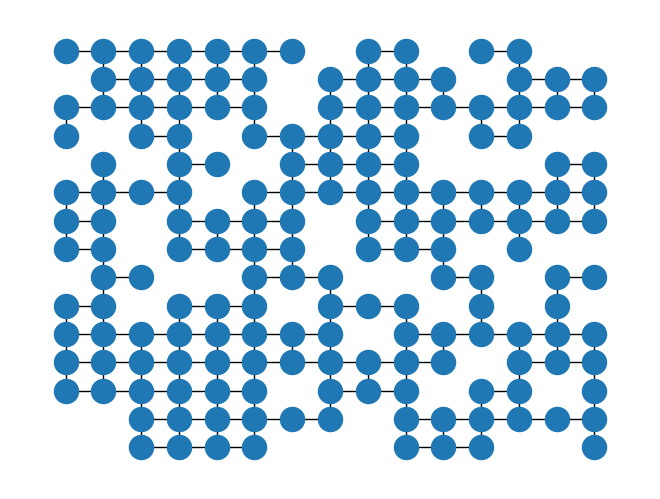

In [41]:
nx.draw(G,pos)

In [43]:
import heapq

def dijkstra(graph, start):
    """
    Custom Dijkstra's algorithm implementation.

    Parameters:
    - graph: a networkx graph object
    - start: the starting node

    Returns:
    - distances: a dictionary with the shortest distance from start to every node
    - predecessors: a dictionary with the preceding node in the shortest path
    - visited_nodes: list of nodes visited in the order of visitation
    """
    distances = {node: float('infinity') for node in graph.nodes()}
    distances[start] = 0
    predecessors = {node: None for node in graph.nodes()}
    priority_queue = [(0, start)]
    visited_nodes = []

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue
        
        visited_nodes.append(current_node)

        for neighbor, edge_attributes in graph[current_node].items():
            weight = edge_attributes["weight"]
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances, predecessors, visited_nodes

def shortest_path(predecessors, start, end):
    """
    Reconstruct the shortest path from the predecessors.

    Parameters:
    - predecessors: a dictionary with the preceding node in the shortest path
    - start: the starting node
    - end: the ending node

    Returns:
    - path: list of nodes representing the shortest path from start to end
    """
    path = [end]
    while path[-1] != start:
        path.append(predecessors[path[-1]])
    path.reverse()
    return path

In [44]:
start=list(G.nodes())[0]
end=list(G.nodes())[-1]

In [45]:
distances, predecessors, visited_nodes = dijkstra(G, start)  # Call dijkstra first
path = shortest_path(predecessors, start,end)  # Then call shortest_path

In [48]:
path

[(0, 2),
 (1, 2),
 (2, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (7, 2),
 (8, 2),
 (9, 2),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (14, 2)]

## Make frames

In [55]:
def make_frames_dijkstra(G,start,end):
    distances, predecessors, visited_nodes = dijkstra(G, start)  # Call dijkstra first
    path = shortest_path(predecessors, start,end)
    n=len(path)
    ans=[path[:k] for k in range(0,n+1)]
    return ans

In [56]:
make_frames_dijkstra(G,start,end)

[[],
 [(0, 2)],
 [(0, 2), (1, 2)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 2), (1, 2), (2, 2), (2, 1)],
 [(0, 2), (1, 2), (2, 2), (2, 1), (3, 1)],
 [(0, 2), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1)],
 [(0, 2), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(0, 2), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(0, 2), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 2),
  (1, 2),
  (2, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (7, 2)],
 [(0, 2),
  (1, 2),
  (2, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (7, 2),
  (8, 2)],
 [(0, 2),
  (1, 2),
  (2, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (7, 2),
  (8, 2),
  (9, 2)],
 [(0, 2),
  (1, 2),
  (2, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (7, 2),
  (8, 2),
  (9, 2),
  (9, 1)],
 [(0, 2),
  (1, 2),
  (2, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (7, 2),
  (8, 2),
  (9, 2),
  (9, 1),
  (10, 1)],
 [

## Same component

In [57]:
def in_same_component(G, node1, node2):
    """
    Check if node1 and node2 are in the same connected component of graph G.
    
    Parameters:
    - G (nx.Graph): The graph.
    - node1: First node.
    - node2: Second node.
    
    Returns:
    - bool: True if node1 and node2 are in the same connected component, False otherwise.
    """
    for component in nx.connected_components(G):
        if node1 in component and node2 in component:
            return True
    return False

### Animate Dijkstra

In [159]:
def animate_dijkstra(Graph,start,end,pos):

    if not in_same_component(Graph,start,end):
        return "The graph is not Eulerian"

    G=Graph.copy()
    frames=make_frames_dijkstra(G,start,end)
    #frames=fleury(G)
    pos = pos  # positions for all nodes. There are other possibilities fo layout...
    fig, ax = plt.subplots()
     # format figure
    fig.set_facecolor('cornsilk')
    ax.set_facecolor('cornsilk')
     # List of points
            
    
    
    def update(frame):
        ax.clear()
        ax.set_title("Dijkstra's algorithm",color="black",fontsize=18)
        nodes=list(G.nodes())
        ax.set_xlim(min([node[0] for node in nodes])-1, max([node[0] for node in nodes])+1)   # Setting x-axis limits
        ax.set_ylim(min([node[1] for node in nodes])-1, max([node[1] for node in nodes])+1)   # Setting x-axis limits    
        #node_colors=[np.random.choice(["black","red"]) for item in list(G.nodes)]
        node_color_dict={node:"black" for node in list(G.nodes())}
        edge_color_dict={edge:"black" for edge in list(G.edges())}
        n=len(frame)
        for i in range(n):
            node_color_dict[frame[i]]="palegreen"
        node_color_dict[start]="deeppink"
        node_color_dict[end]="deeppink"
        for i in range(n-1):
            edge_color_dict[(frame[i],frame[i+1])]="palegreen"
        node_colors=[node_color_dict[node] for node in list(G.nodes())]
        edge_colors=[edge_color_dict[edge] for edge in list(G.edges())]
        nx.draw(G, pos=pos, ax=ax,edge_color=edge_colors,node_color=node_colors,width=3,node_size=100)
       
        

    ani = FuncAnimation(fig, update, frames=frames, repeat=True)

    # Convert the animation to a JSHTML representation
    ani_jshtml = ani.to_jshtml()
    #print(frames)
    # Display the animation
    return(HTML(ani_jshtml))

In [163]:
ans=make_instance(20,20,0.7)
G=ans["graph"]
pos=ans["pos"]

In [164]:
nx.is_connected(G)

False

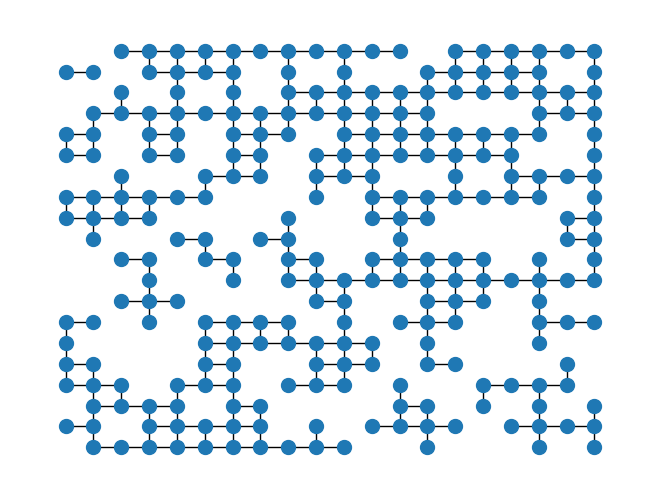

In [120]:
nx.draw(G,pos,node_size=100)

In [92]:
n=len(list(G.nodes()))

In [95]:
n

317

In [169]:
start=list(G.nodes())[0]
end=list(G.nodes())[220]

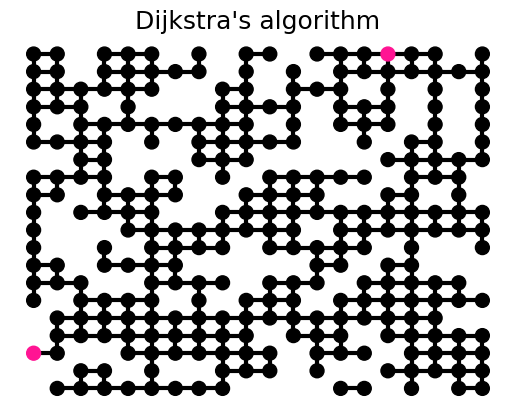

In [170]:
animate_dijkstra(G,start,end,pos)